In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("display.max_row", 200)
pd.set_option("display.max_columns", 25)

In [2]:
# This CSV is from a Kaggle dataset on movies on streaming platforms: https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney
# For convenience, a version is included in the repo in the data directory

movies = pd.read_csv("data/MoviesOnStreamingPlatforms.csv")

In [3]:
movies.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [4]:
movies.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [5]:
# drop the '%' from the RT score and parse it as a float
movies["Rotten Tomatoes"] = movies["Rotten Tomatoes"].str.replace("%", "").astype(float)
# drop the Type column entirely, as all values appear to be zero
# drop the Unnamed column, as it's just an index column
movies.drop(columns=["Unnamed: 0", "Type"], inplace=True)

In [6]:
# Figure out if the ID is a unique identifier
movies["ID"].is_unique

True

In [7]:
# As it is, use it as the index of the DF
movies.set_index("ID", inplace=True)

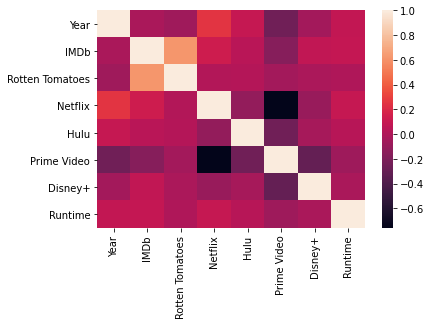

In [8]:
sn.heatmap(movies.corr())
plt.show()

<AxesSubplot:>

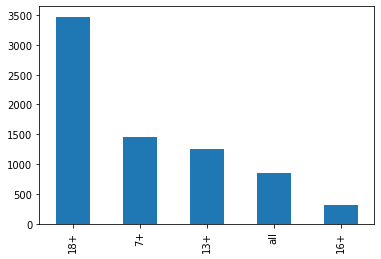

In [9]:
# look at how many movies in the dataset have each rating
movies["Age"].value_counts().plot(kind="bar")

<AxesSubplot:>

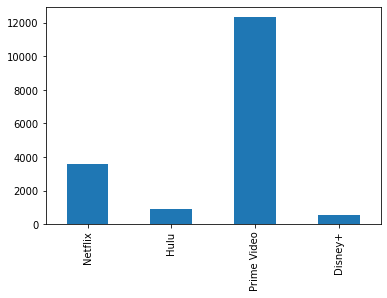

In [10]:
# plot each movie streaming platform to get an idea of the distribution of titles
movies[["Netflix", "Hulu", "Prime Video", "Disney+"]].sum().plot(kind="bar")

<AxesSubplot:xlabel='IMDb', ylabel='Rotten Tomatoes'>

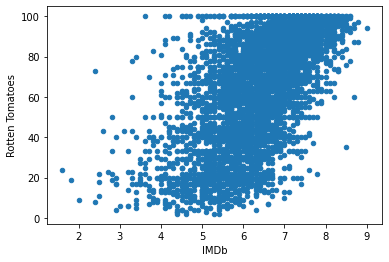

In [11]:
movies.plot.scatter(x="IMDb", y="Rotten Tomatoes")

In [12]:
# There are movies without runtimes - what proportion lack them?
movies["Runtime"].isnull().sum() / len(movies)

0.035355948399426664